In [0]:
import twitter
CONSUMER_KEY = ''
CONSUMER_SECRET = '' 
OAUTH_TOKEN = '' 
OAUTH_TOKEN_SECRET = ''
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print (twitter_api)



In [0]:
import json
WORLD_WOE_ID = 1 
US_WOE_ID = 23424977
# Prefix ID with the underscore for query string parameterization. # Without the underscore, the twitter package appends the ID value # to the URL itself as a special case keyword argument.
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) 
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
print (json.dumps(world_trends, indent=1))
print 
print (json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#UTAGE",
    "url": "http://twitter.com/search?q=%23UTAGE",
    "promoted_content": null,
    "query": "%23UTAGE",
    "tweet_volume": 129217
   },
   {
    "name": "#TaylorSwiftOnGMA",
    "url": "http://twitter.com/search?q=%23TaylorSwiftOnGMA",
    "promoted_content": null,
    "query": "%23TaylorSwiftOnGMA",
    "tweet_volume": 86689
   },
   {
    "name": "GSOMIA\u7834\u68c4",
    "url": "http://twitter.com/search?q=GSOMIA%E7%A0%B4%E6%A3%84",
    "promoted_content": null,
    "query": "GSOMIA%E7%A0%B4%E6%A3%84",
    "tweet_volume": null
   },
   {
    "name": "#FelizJueves",
    "url": "http://twitter.com/search?q=%23FelizJueves",
    "promoted_content": null,
    "query": "%23FelizJueves",
    "tweet_volume": 20202
   },
   {
    "name": "#KCON2019THAILAND",
    "url": "http://twitter.com/search?q=%23KCON2019THAILAND",
    "promoted_content": null,
    "query": "%23KCON2019THAILAND",
    "tweet_volume": 95333
   },
   {
    "name": "#\ub9c8\ub

In [0]:
import json
WORLD_WOE_ID = 1 
US_WOE_ID = 23424977
# Prefix ID with the underscore for query string parameterization. # Without the underscore, the twitter package appends the ID value # to the URL itself as a special case keyword argument.
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) 
us_trends = twitter_api.trends.place(_id=US_WOE_ID)
world_trends_set = set([trend['name']                        
                        for trend in world_trends[0]['trends']])
us_trends_set = set([trend['name']                      
                     for trend in us_trends[0]['trends']]) 
common_trends = world_trends_set.intersection(us_trends_set)
print (common_trends)


{'#TaylorSwiftOnGMA', 'Junior Agogo', '#FelizJueves', '#ThursdayThoughts', '#GOT7inSydney', '#SignsYoureGettingFired', '#막방볼사람다MOA'}


In [0]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote
import json

q='#Ethiopia'


count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

# Iterate through 5 more batches of results by following the cursor
print(search_results['search_metadata'])
for _ in range(5):
    print("Length of statuses", len(statuses))

    try:
        #print(search_results['search_metadata'])
        next_results = search_results['search_metadata']['next_results']

    except KeyError: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))


{'completed_in': 0.111, 'max_id': 1165886286395322368, 'max_id_str': '1165886286395322368', 'next_results': '?max_id=1165877420202713087&q=%23Ethiopia&count=100&include_entities=1', 'query': '%23Ethiopia', 'refresh_url': '?since_id=1165886286395322368&q=%23Ethiopia&include_entities=1', 'count': 100, 'since_id': 0, 'since_id_str': '0'}
Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 499
{
 "created_at": "Mon Aug 26 07:18:46 +0000 2019",
 "id": 1165886286395322368,
 "id_str": "1165886286395322368",
 "text": "RT @Mohammed222022: @YehenewW @nytimes @mukmohware2121 @etBritish @malonebarry @martinplaut @Yetnayet1 @HistoryHeroes @diplocourier @_iwake\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "Mohammed222022",
    "name": "mohammed ahmed",
    "id": 2400492211,
    "id_str": "2400492211",
    "indices": [
     3,
     18
    ]
   },
   {
    "screen_n

In [0]:
status_texts = [ status['text']                  
                for status in statuses ]
screen_names = [ user_mention['screen_name']                  
                for status in statuses                     
                for user_mention in status['entities']['user_mentions'] ]
hashtags = [ hashtag['text']             
            for status in statuses                 
            for hashtag in status['entities']['hashtags'] ]
# Compute a collection of all words from all tweets 
words = [ w  
         for t in status_texts             
         for w in t.split() ]
# Explore the first 5 items for each...
print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1)) 
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))


[
 "RT @Mohammed222022: @YehenewW @nytimes @mukmohware2121 @etBritish @malonebarry @martinplaut @Yetnayet1 @HistoryHeroes @diplocourier @_iwake\u2026",
 "PM Abiy Ahmed met with the President of the EXIM Bank of the Republic of #Korea. The parties discussed ongoing and\u2026 https://t.co/1qQRRoLVGW",
 "RT @PMEthiopia: PM Abiy Ahmed met with the President of the EXIM Bank of the Republic of Korea. The parties discussed ongoing and potential\u2026",
 "RT @zemicky_D: \u1218\u12ae\u1295\u1296\u127d \u1263\u1245\u120b\u1263 \u1264\u1275 #AddisAbaba #Piassa #Ethiopia https://t.co/Alu0dza44R",
 "RT @coachblade: Soon-to-be new @IAAF women\u2019s 1500m WR\u2753\n\ud83d\udc49\ud83c\udffcMeet J. Eastwood (left) who is now June Eastwood (right) and will be racing @NCAA\u2026"
]
[
 "Mohammed222022",
 "YehenewW",
 "nytimes",
 "mukmohware2121",
 "etBritish"
]
[
 "Korea",
 "AddisAbaba",
 "Piassa",
 "Ethiopia",
 "kurt"
]
[
 "RT",
 "@Mohammed222022:",
 "@YehenewW",
 "@nytimes",
 "@mukmohware2121"
]


In [0]:
from collections import Counter
for item in [words, screen_names, hashtags]:   
    c = Counter(item)   
    print (c.most_common()[:10]) # top 10    print


[('RT', 382), ('the', 327), ('#Ethiopia', 304), ('of', 217), ('in', 209), ('to', 149), ('a', 143), ('and', 118), ('is', 117), ('for', 102)]
[('RnfrstAll_UK', 36), ('amitabhk87', 36), ('SDG2030', 35), ('AidanRGallagher', 35), ('IAAF', 29), ('coachblade', 28), ('NCAA', 28), ('PMEthiopia', 22), ('mystical_ethio', 21), ('Abelpoly', 17)]
[('Ethiopia', 362), ('Jobs', 38), ('Eritrea', 37), ('reforestation', 37), ('Africa', 31), ('SouthAfrica', 31), ('Rwanda', 29), ('African', 28), ('Ghana', 26), ('EastAfrica', 25)]


In [0]:
from prettytable import PrettyTable
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):   
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)    
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]   
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment    
    print (pt)


+-----------+-------+
| Word      | Count |
+-----------+-------+
| RT        |   382 |
| the       |   327 |
| #Ethiopia |   304 |
| of        |   217 |
| in        |   209 |
| to        |   149 |
| a         |   143 |
| and       |   118 |
| is        |   117 |
| for       |   102 |
+-----------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| RnfrstAll_UK    |    36 |
| amitabhk87      |    36 |
| SDG2030         |    35 |
| AidanRGallagher |    35 |
| IAAF            |    29 |
| coachblade      |    28 |
| NCAA            |    28 |
| PMEthiopia      |    22 |
| mystical_ethio  |    21 |
| Abelpoly        |    17 |
+-----------------+-------+
+---------------+-------+
| Hashtag       | Count |
+---------------+-------+
| Ethiopia      |   362 |
| Jobs          |    38 |
| Eritrea       |    37 |
| reforestation |    37 |
| Africa        |    31 |
| SouthAfrica   |    31 |
| Rwanda        |    29 |
| African       |    28 |
| Ghana       

In [0]:
# A function for computing lexical diversity 
def lexical_diversity(tokens):    
    return 1.0*len(set(tokens))/len(tokens) 
# A function for computing the average number of words per tweet 
def average_words(statuses):    
    total_words = sum([ len(s.split()) for s in statuses ])     
    return 1.0*total_words/len(statuses)
print (lexical_diversity(words)) 
print (lexical_diversity(screen_names)) 
print (lexical_diversity(hashtags)) 
print (average_words(status_texts))


0.3071435276447949
0.2995658465991317
0.22967309304274938
17.784641068447414


In [0]:
retweets = [           
    # Store out a tuple of these three values ...            
    (status['retweet_count'],             
     status['retweeted_status']['user']['screen_name'],           
     status['text'])                         
    # ... for each status ...            
    for status in statuses                        
    # ... so long as the status meets this condition.   
    
          if ('retweeted_status' in status )       
]
# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text']) 
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ] 
pt.max_width['Text'] = 50 
pt.align= 'l'
print (pt)

+-------+-------------+----------------------------------------------------+
| Count | Screen Name | Text                                               |
+-------+-------------+----------------------------------------------------+
| 1133  | hawelti     | RT @hawelti: #Eritrea, #Ethiopia History in the    |
|       |             | making: the pictures say it all                    |
|       |             | https://t.co/lMv8RlsYYo                            |
| 434   | wef         | RT @wef: It smashed the previous record of 66      |
|       |             | million set by India in 2017.                      |
|       |             |                                                    |
|       |             | 📕 Read more: https://t.co/KZ53KOsjaO #ethiopia     |
|       |             | #nature https:/…                                   |
| 303   | Zemedeneh   | RT @Zemedeneh: How good is #Ethiopia’s coffee?     |
|       |             | It’s so good that Rolls-Royce, the ultra luxury    |

In [0]:
# Get the original tweet id for a tweet from its retweeted_status node # and insert it here in place of the sample value that is provided # from the text of the book
_retweets = twitter_api.statuses.retweets(id=317127304981667841) 
print ([r['user']['screen_name'] for r in _retweets])


['jyeee', 'Ceejaynatics', 'LoveKyana18', 'kidamgos', 'asdfghjbl', 'josellexseraspi', 'anneyyeong']


Text(0.5, 0, 'Word Rank')

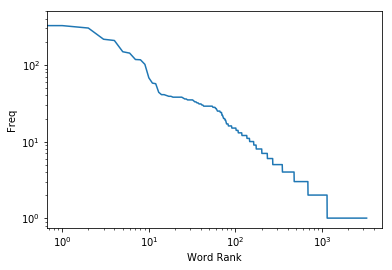

In [0]:
from matplotlib import pyplot as plt
word_counts = sorted(Counter(words).values(), reverse=True)
plt.loglog(word_counts) 
plt.ylabel("Freq") 
plt.xlabel("Word Rank")


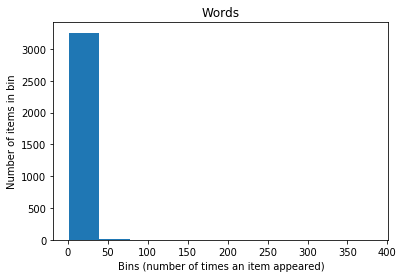

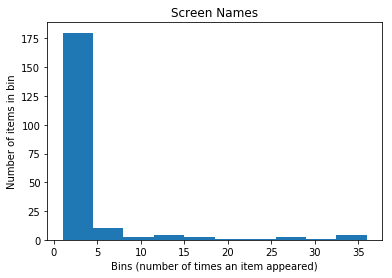

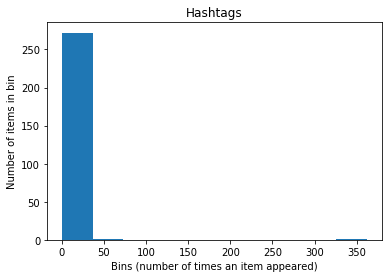

<Figure size 432x288 with 0 Axes>

In [0]:
for label, data in (('Words', words),                  
                    ('Screen Names', screen_names),          
                    ('Hashtags', hashtags)):
    # Build a frequency map for each set of data    # and plot the values
    c = Counter(data)   
    plt.hist(c.values())        # Add a title and y-label ...    
    plt.title(label)  
    plt.ylabel("Number of items in bin") 
    plt.xlabel("Bins (number of times an item appeared)")        # ... and display as a new figure    
    plt.figure()



[19, 6, 7, 29, 3, 93, 8, 6, 29, 18, 5, 10, 263, 27, 3, 10, 7, 2, 14, 22, 48, 29, 6, 19, 4, 11, 94, 12, 6, 21, 2, 21, 32, 8, 5, 29, 40, 8, 17, 14, 21, 3, 16, 1, 14, 38, 15, 10, 19, 42, 23, 6, 33, 28, 4, 11, 1, 6, 6, 29, 13, 29, 3, 1, 2, 2, 29, 10, 8, 2, 2, 29, 4, 1, 1, 11, 36, 51, 29, 36, 1, 5, 3, 2, 29, 29, 29, 7, 29, 6, 15, 2, 8, 2, 7, 3, 36, 29, 29, 1, 3, 1, 1, 29, 18, 7, 29, 7, 29, 3, 18, 18, 271, 3, 8, 13, 29, 29, 29, 29, 7, 0, 15, 6, 7, 1, 7, 7, 3, 1, 8, 1, 1, 7, 29, 8, 51, 6, 8, 2, 8, 7, 1, 7, 1, 1, 1, 29, 120, 3, 8, 6, 6, 8, 10, 29, 29, 29, 29, 6, 2, 30, 7, 29, 36, 8, 1, 1, 158, 7, 4, 36, 3, 12, 5, 185, 15, 36, 1, 30, 1, 5, 36, 30, 30, 1, 26, 18, 7, 36, 1, 1, 120, 4, 4, 10, 120, 2, 13, 1, 8, 2, 8, 13, 7, 36, 2, 1, 120, 1, 2, 13, 1, 36, 7, 1, 1, 5, 7, 2, 36, 1, 1, 1, 1, 7, 7, 8, 116, 2, 1, 1, 303, 77, 1, 36, 8, 1, 2, 5, 8, 10, 7, 120, 36, 7, 18, 36, 2, 1, 303, 11, 10, 1, 1, 36, 29, 10, 13, 7, 33, 7, 1, 120, 3, 3, 29, 3, 7, 120, 120, 10, 29, 36, 18, 2, 29, 1, 18, 18, 116, 36, 30, 

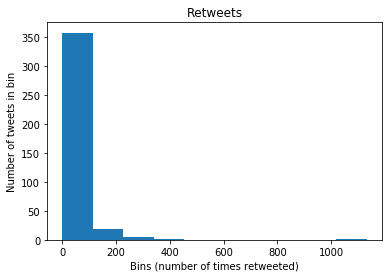

In [0]:
# Using underscores while unpacking values in # a tuple is idiomatic for discarding them
counts = [count for count, _, _ in retweets]
plt.hist(counts) 
plt.title("Retweets") 
plt.xlabel('Bins (number of times retweeted)') 
plt.ylabel('Number of tweets in bin')
print (counts)